# Simulate measurements from V1, V2 and V3 waveforms

Starting with a `.npy`-representation of source (patch) activity made with [this notebook](Make%20V1-V3%20waveforms.ipynb), forward model data for different stimulus locations.

In [1]:
%matplotlib qt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.misc import imread

## Load the source data

In [9]:
imname = 'Hagler2014-Fig8D-cropped.npy'
fs = 250.  # Hz

In [10]:
# n_times x 4 (= [t_axis, V1, V2, V3])
waveforms = np.load(imname.split('.')[0] + '.npy')

In [13]:
# fig, ax = plt.subplots(1,1)
# ax.plot(waveforms[0], waveforms[1:].T)

## Load the forward data

In [14]:
from retinotopic_helpers import *
from mne.io import read_raw_fif

In [15]:
# ch_type = 'meg'  # may make little sense, since scale of 'grad' dominates!
# ch_type = 'grad'
ch_type = 'mag'

regions = ['V1', 'V2', 'V3']

In [16]:
data_path = '/Users/cjb/projects/CFF_Retinotopy/scratch'
subject = '030_WAH'
subjects_dir = join(data_path, 'fs_subjects_dir')
fname_fwd = join(data_path, 'restricted_1LBEM-fwd.fif')
fname_raw = join(data_path, 'VS1_cropped1sec.fif')
info = read_raw_fif(fname_raw, preload=False).info

Opening raw data file /Users/cjb/data/MINDLAB2013_01-MEG-AttentionEmotionVisualTracking/scratch/VS1_cropped1sec.fif...
This filename (/Users/cjb/data/MINDLAB2013_01-MEG-AttentionEmotionVisualTracking/scratch/VS1_cropped1sec.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
    Range : 166000 ... 167000 =    166.000 ...   167.000 secs
Ready.
Current compensation grade : 0


<ipython-input-16-535f17674584>:6: RuntimeWarning: This filename (/Users/cjb/data/MINDLAB2013_01-MEG-AttentionEmotionVisualTracking/scratch/VS1_cropped1sec.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  info = read_raw_fif(fname_raw, preload=False).info


In [17]:
fwd = read_forward_solution(fname_fwd)
# change to surface coords & select channel type(s)
fwd = prepare_gain(fwd, ch_type=ch_type)
fwd_fixed = convert_forward_solution(fwd, force_fixed=True, copy=True)

Reading forward solution from /Users/cjb/projects/CFF_Retinotopy/scratch/restricted_1LBEM-fwd.fif...
    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (9700 sources, 306 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame
    Cartesian source orientations...
[done]
    102 out of 306 channels remain after picking
    Changing to fixed-orientation forward solution with surface-based source orientations...
    [done]


In [ ]:
evoked = simulate_evoked(fwd_fixed, stc, info, cov=cov, snr=snr)

In [18]:
from retinotopic_helpers import _stc_from_labels

In [19]:
# get all RM-labels
labels = get_RM_labels(subject, subjects_dir=subjects_dir)

Reading labels from parcellation..
   read 18 labels from /Users/cjb/projects/CFF_Retinotopy/scratch/fs_subjects_dir/030_WAH/label/lh.RM.V1.annot
[done]
Reading labels from parcellation..
   read 18 labels from /Users/cjb/projects/CFF_Retinotopy/scratch/fs_subjects_dir/030_WAH/label/rh.RM.V1.annot
[done]
Reading labels from parcellation..
   read 18 labels from /Users/cjb/projects/CFF_Retinotopy/scratch/fs_subjects_dir/030_WAH/label/lh.RM.V2.annot
[done]
Reading labels from parcellation..
   read 18 labels from /Users/cjb/projects/CFF_Retinotopy/scratch/fs_subjects_dir/030_WAH/label/rh.RM.V2.annot
[done]
Reading labels from parcellation..
   read 18 labels from /Users/cjb/projects/CFF_Retinotopy/scratch/fs_subjects_dir/030_WAH/label/lh.RM.V3.annot
[done]
Reading labels from parcellation..
   read 18 labels from /Users/cjb/projects/CFF_Retinotopy/scratch/fs_subjects_dir/030_WAH/label/rh.RM.V3.annot
[done]


In [20]:
cur_labs = []
for reg in ['V1', 'V2', 'V3']:
    cur_labs.append(find_labels_in_list(labels[reg]['rh'], '129')[0])

In [50]:
# For development / debugging
# import retinotopic_helpers
# import importlib
# importlib.reload(retinotopic_helpers)
# _stc_from_labels = retinotopic_helpers._stc_from_labels

In [51]:
tmin = waveforms[0][0]
tstep = waveforms[0][1] - waveforms[0][0]
stc = _stc_from_labels(cur_labs, amp=waveforms[1:] * 1e-9,
                       tmin=tmin, tstep=tstep)

In [52]:
# fig, ax = plt.subplots(1,1)
# ax.plot(stc.times, stc.data.T)

In [53]:
# brain = stc.plot(subject=subject, subjects_dir=subjects_dir,
#                  hemi='rh', time_viewer=True)

Projecting source estimate to sensor space...
[done]


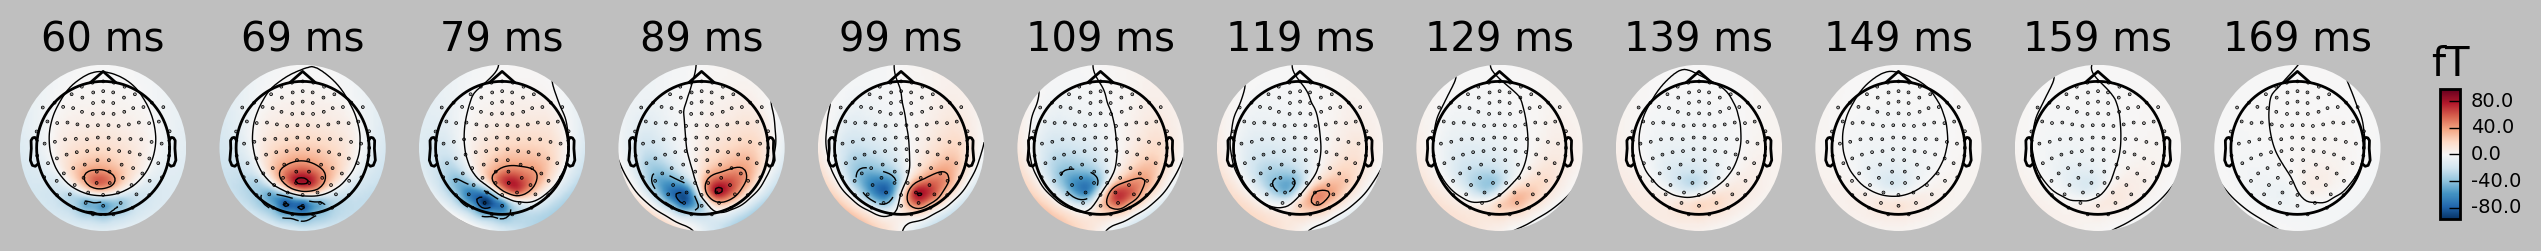

In [55]:
evoked = simulate_evoked(fwd_fixed, stc, info, cov=None, snr=np.inf)
evoked.plot_topomap(times=np.arange(0.06, 0.18, 0.01), ch_type='mag',
                    outlines='skirt', colorbar=True)

/Users/cjb/miniconda_envs/oldqt/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


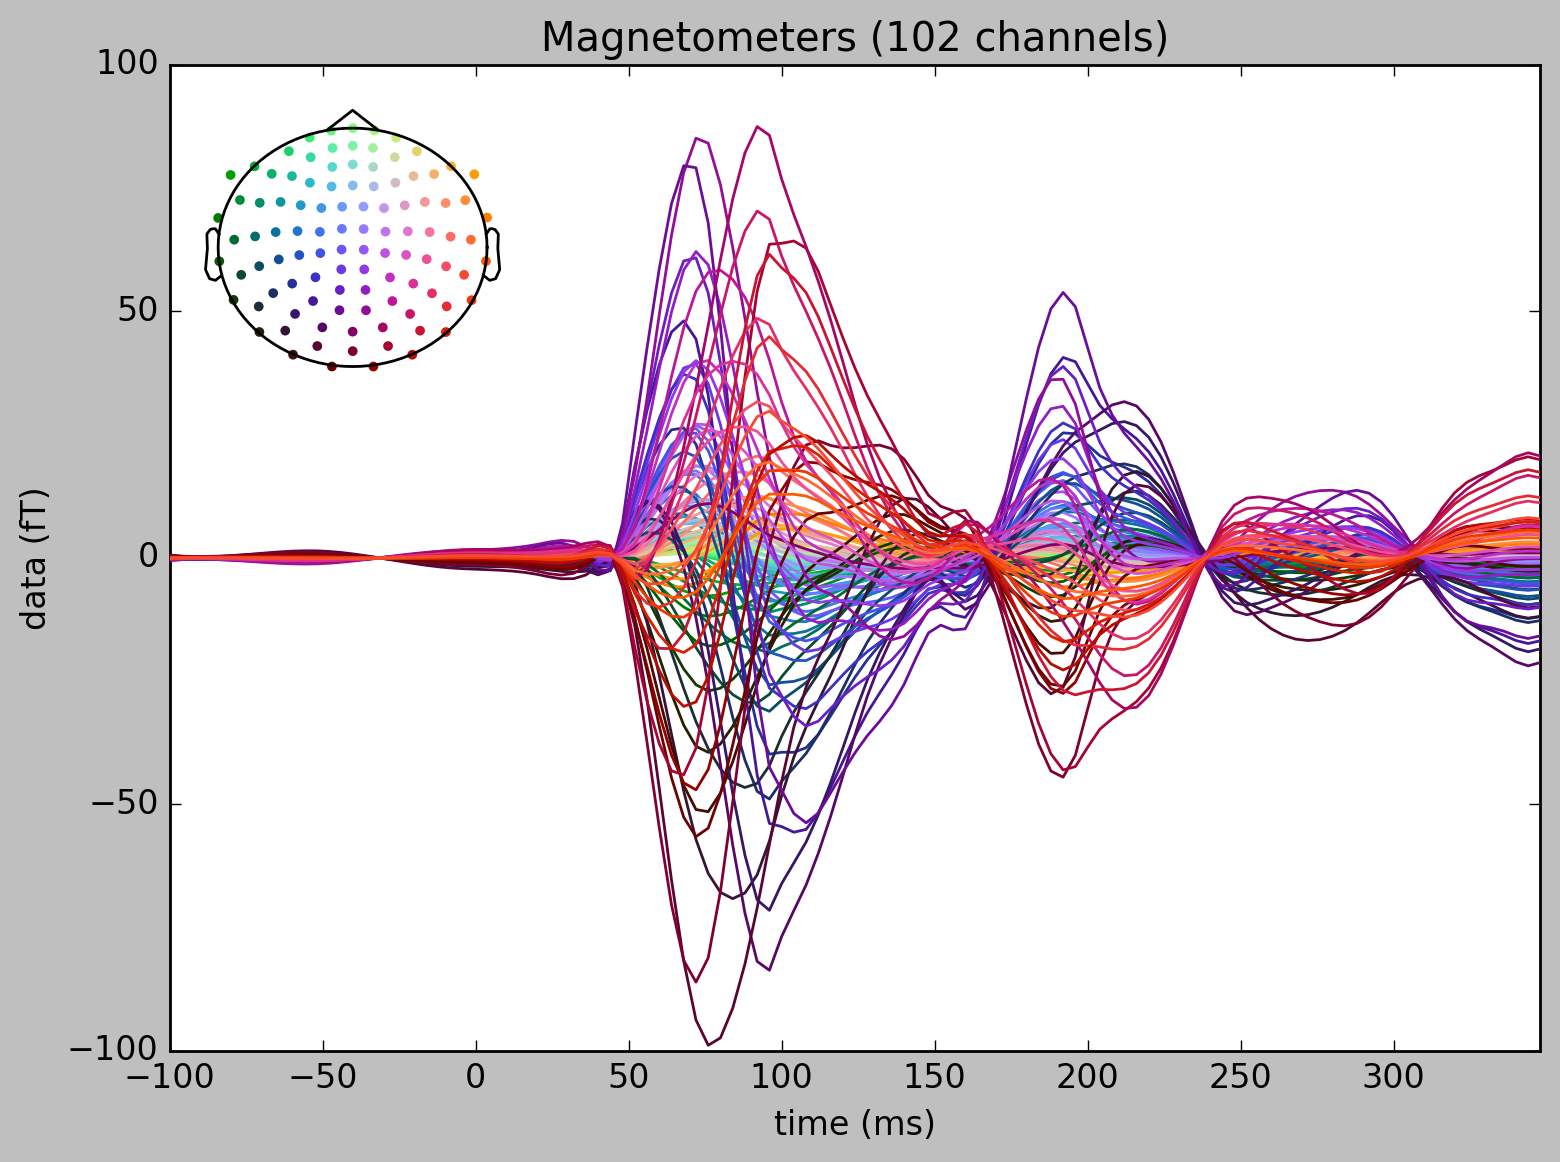

In [58]:
evoked.plot(spatial_colors=True)